# Notebook to quickly check the saved model images

(these are the ones that the point spread function have been applied to; in something like "*flattened.hdf5")

## Imports

In [37]:
import muscle_model as mm
import os
import h5py
import cPickle
import cv2 

import numpy as np
import matplotlib.pyplot as plt

## Helper functions

In [38]:
muscle_names = ['b1', 'b2', 'b3', 'i1', 'i2', 'iii1', 'iii24', 'iii3',
                'hg1', 'hg2', 'hg3', 'hg4']
def draw_muscle_outlines(ax, outline_dict, line_width=0.75,  line_style='-', 
                         line_color='k', outline_alpha=1, muscle_names=muscle_names ):
    """
    Convenience function to create plot objects for muscle outlines on input axis
    
    outline_color = 'y'  #'r' 
    outline_lw = 0.75  # linewidth
    outline_alpha = 0.5
    outline_ls = ':'
    
    muscle_names = ['b1', 'b2', 'b3', 'i1', 'i2', 'iii1', 'iii24', 'iii3',
                'hg1', 'hg2', 'hg3', 'hg4']
    """
    # initialize storage
    outline_plot_dict = dict()
    
    # need to add a condition for intializing plots
    for name in muscle_names:
        p, = ax.plot(outline_dict[name][0,:],outline_dict[name][1,:], ls=line_style, 
                     lw=line_width, color=line_color, label=name, alpha=outline_alpha)
        outline_plot_dict[name] = p
    
    # return our dictionary of plot objects
    return outline_plot_dict


## Load muscle model image data

In [39]:
# path to model images
scratch_dir = os.path.abspath("")
parent_dir = os.path.normpath(os.path.join(scratch_dir, '..', '..'))

unmixing_filters = os.path.join(parent_dir, 'muscle_model', 'unmixing_filters', 
                                'NA_0.45_200mm_Tube_FN1', 'flatened_model.hdf5')

In [41]:
# load contents of model hdf5 file, using the profile muscles to pick the appropriate muscle keys
# muscles = ['DVM1', 'DVM2', 'DVM3', 'b1', 'b2', 'b3', 'hg1', 'hg2', 'hg3', 'hg4', 'i1', 
#            'i2', 'iii1', 'iii24', 'iii3', 'nm', 'pr', 'tpd', 'tpv', 'ttm']
muscles = ['b1', 'b2', 'b3', 'hg1', 'hg2', 'hg3', 'hg4', 'i1', 
           'i2', 'iii1', 'iii24', 'iii3', 'nm', 'pr']
model_muscles = dict()

with h5py.File(unmixing_filters,'r') as f:
    for muscle in muscles:
        model_muscles[muscle] = np.array(f[muscle][:])

## Also load muscle outlines

In [42]:
# confocal frame -- this can be hard-coded or loaded from outlines data 
outlines_path = os.path.join(parent_dir, 'planotaxis', 'models', 'thorax', 'outlines.cpkl')

with open(outlines_path,'rb') as f:
    outlines_data = cPickle.load(f)
    

## Visualize muscle model images

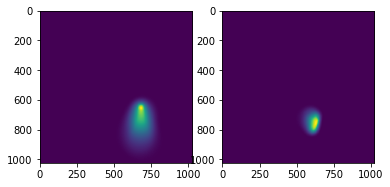

In [43]:
# test
# muscle_img = model_muscles['iii3']
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(model_muscles['hg2'])
ax2.imshow(model_muscles['hg4'])

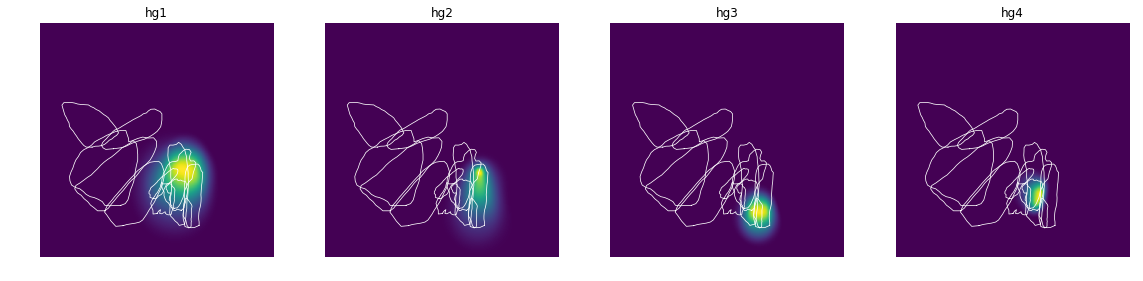

In [44]:
# look at the hg muscles
fig, ax_list = plt.subplots(1,4,figsize=(16,5))
ax_list = ax_list.ravel()

hg_muscles = ['hg%d'%(n) for n in range(1,5)]

for ith, muscle in enumerate(hg_muscles):
    ax_list[ith].imshow(model_muscles[muscle])
    ax_list[ith].set_title(muscle)
    ax_list[ith].axis('off')
    
    # draw outlines?
    outline_plots = draw_muscle_outlines(ax_list[ith], outlines_data, line_color='w')
    
fig.tight_layout()

In [46]:
# # look at the hg muscles
# fig, ax_list = plt.subplots(1,4,figsize=(16,5))
# ax_list = ax_list.ravel()

# hg_muscles = ['hg%d'%(n) for n in range(1,5)]

# for ith, muscle in enumerate(hg_muscles):
#     ax_list[ith].imshow(model_muscles[muscle])
#     ax_list[ith].set_title(muscle)
#     ax_list[ith].axis('off')
    
#     # draw outlines?
#     outline_plots = draw_muscle_outlines(ax_list[ith], outlines_data, line_color='w')
    
# fig.tight_layout()